https://runestone.academy/runestone/books/published/pythonds3/BasicDS/ImplementingaQueueinPython.html

Computer science also has common examples of queues. Our computer laboratory has 30 computers networked with a single printer. When students want to print, their print tasks “get in line” with all the other printing tasks that are waiting. The first task in is the next to be completed. If you are last in line, you must wait for all the other tasks to print ahead of you. We will explore this interesting example in more detail later.

In addition to printing queues, operating systems use a number of different queues to control processes within a computer. The scheduling of what gets done next is typically based on a queuing algorithm that tries to execute programs as quickly as possible and serve as many users as it can. 

The queue abstract data type is defined by the following structure and operations. A queue is structured, as described above, as an ordered collection of items which are added at one end, called the “rear,” and removed from the other end, called the “front.” Queues maintain a FIFO (First in First Out) ordering property. The queue operations are given below.

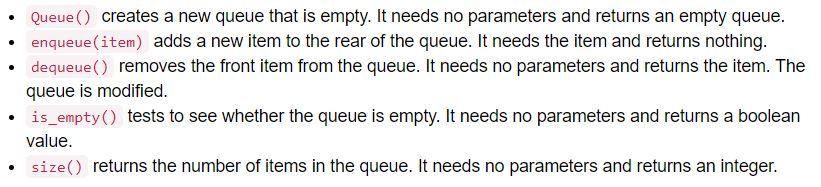

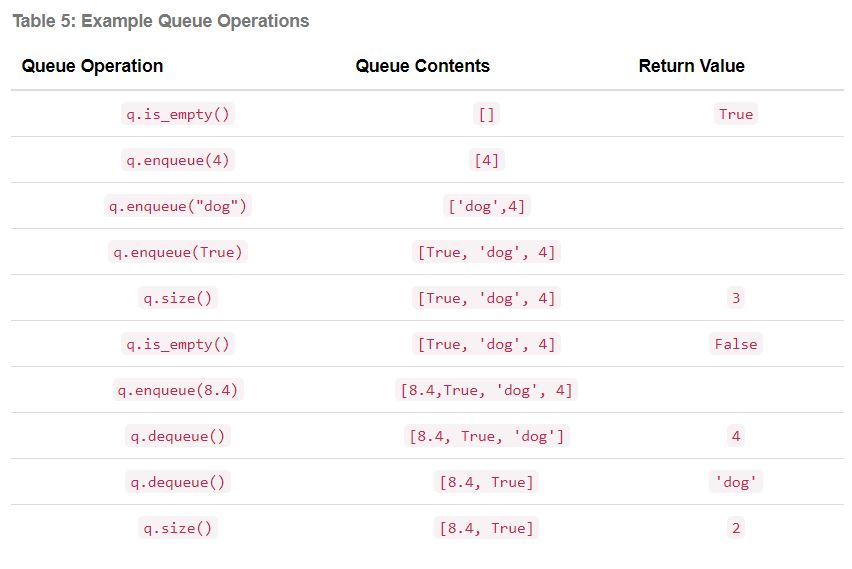

We need to decide which end of the list to use as the rear and which to use as the front. The implementation shown in Listing 1 assumes that the rear is at position 0 in the list. This allows us to use the insert function on lists to add new elements to the rear of the queue. The pop operation can be used to remove the front element (the last element of the list). Recall that this also means that enqueue will be O(n) and dequeue will be O(1).

In [1]:
class Queue: 
    """Queue implementation as a list"""
    
    def __init__(self):
        # Create new queue - initialized as an empty list 
        self._items= []
        
    def is_empty(self):
        # Check if the queue is empty 
        return not bool(self._items)
    
    def enqueue(self, item):
        # Add an item to the queue 
        self._items.insert(0, item)
        
    def dequeue(self):
        # Remove an item from the queue
        return self._items.pop()
    
    def size(self):
        # Get the number of items in the queue 
        return len(self._items)

In [3]:
q = Queue()

print(q)

In [4]:
# Add elements using Queue class

q.enqueue(4)
q.enqueue('dog')
q.enqueue(True)

print(q.size())

3


In [6]:
q.is_empty()

False

In [7]:
q.enqueue(8.4)

In [8]:
q.dequeue()

4

In [10]:
q.dequeue()

'dog'

In [11]:
q.size()

2

In [12]:
# Q-2: Suppose you have the following series of queue operations.

q = Queue()
q.enqueue("hello")
q.enqueue("dog")
q.enqueue(3)
q.dequeue()

'hello'

## 4.13. Simulation: Hot Potato
https://runestone.academy/runestone/books/published/pythonds3/BasicDS/SimulationHotPotato.html

Note that in this example the value of the counting constant is greater than the number of names in the list. This is not a problem since the queue acts like a circle and counting continues back at the beginning until the value is reached. Also, notice that the list is loaded into the queue such that the first name on the list will be at the front of the queue. Bill in this case is the first item in the list and therefore moves to the front of the queue.

In [2]:
from pythonds3.basic import Queue

def hot_potato(name_list, num):
    sim_queue = Queue()
    for name in name_list:
        sim_queue.enqueue(name)
        
    while sim_queue.size() > 1:
        for i in range(num):
            sim_queue.enqueue(sim_queue.dequeue())
            
        sim_queue.dequeue()
    
    return sim_queue.dequeue()


In [3]:
name_list = ["Bill", "David", "Susan", "Jane", "Kent", "Brad"]

In [10]:
# Run the hot potato function and pass in name list as parameter 

print(hot_potato(name_list, 7))


Susan


## 4.14. Simulation: Printing Tasks

https://runestone.academy/runestone/books/published/pythonds3/BasicDS/SimulationPrintingTasks.html

In [11]:
class Printer:
    def __init__(self, ppm):
        self.page_rate = ppm
        self.current_task = None
        self.time_remaining = 0 
        
    def tick(self):
        if self.current_task is not None:
            self.time_remaining = self.time_remaining - 1 
            if self.time_remaining <= 0:
                self.current_task = None 
                
    def busy(self):
        return self.current_task is not None 
    
    def busy(self):
        return self.current_task is not None 
    
    def start_next(self, new_task):
        self.current_task = new_task
        self.time_remaining = new_task.get_pages() * 60 / self.page_rate

The Task class (Listing 3) will represent a single printing task. When the task is created, a random number generator will provide a length from 1 to 20 pages. We have chosen to use the randrange function from the random module.

In [12]:
import random 

random.randrange(1, 21)

9

In [13]:
random.randrange(1, 21)

18

Each task will also need to keep a timestamp to be used for computing waiting time. This timestamp will represent the time that the task was created and placed in the printer queue. The wait_time method can then be used to retrieve the amount of time spent in the queue before printing begins.

In [1]:
# Listing 3 - create timestamp to use wait_time() method

import random 

class Task:
    def __init__(self, time):
        self.timestamp = time 
        self.pages = random.randrange(1, 21)
        
    def get_stamp(self):
        return self.timestamp
    
    def get_pages(self):
        return self.pages
    
    def wait_time(self, current_time):
        return current_time - self.timestamp

# 4.15 What Is a Deque?

Deque - has characteristics of stack and queue but is flexible about where you add elements (either front or rear)
* Also known as double-ended queue
* New items added to either front/rear
* Existing items removed from either end as well
* hybrid linear structure has capabilities of stacks and queues in a single data structure 

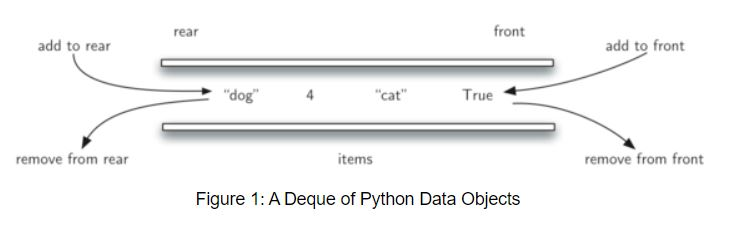

* A deque is structured, as described above, as an ordered collection of items where items are added and removed from either end, either front or rear.

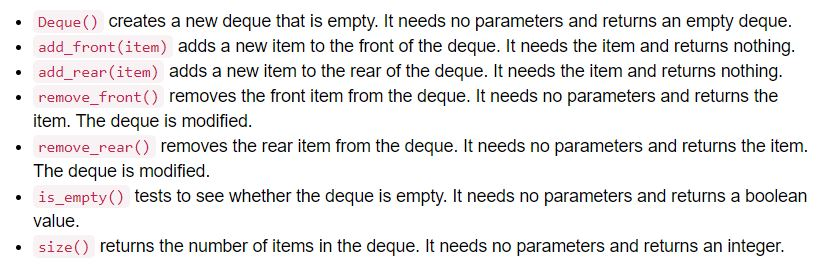

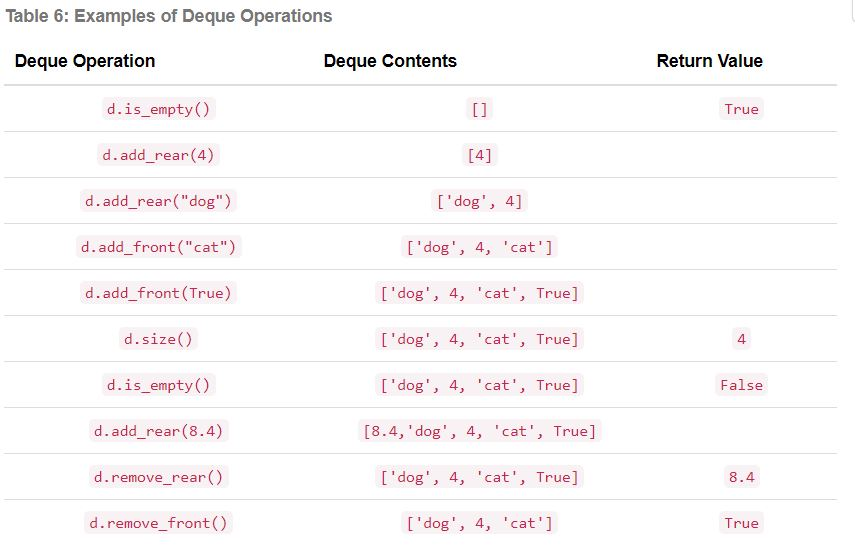

# 4.17. Implementing a Deque 

In [1]:
class Deque: 
    # Deque implementation as a list 
    
    def __init__(self):
        # initalize deque as empty list 
        self._items = []
        
    def is_empty(self):
        # Check if deque is empty 
        return not bool(self._items)
    
    def add_front(self, item):
        # Add an item to the front of the deque
        self._items.append(item)
    
    def add_rear(self, item):
        # Add an item to the rear of the deque
        self._items.insert(0, item)
    
    def remove_front(self, item):
        # Remove an item from the front of the deque 
        self._items.pop()
        
    def remove_rear(self, item):
        # Remove an item from the rear of the deque 
        self._items.pop(0)
        
    def total_count(self, item):
        # Get the number of items in the deque 
        return len(self._items)
        

# 4.18. Palindrome-Checker

An interesting problem that can be easily solved using the deque data structure is the classic palindrome problem. A palindrome is a string that reads the same forward and backward, for example, radar, toot, and madam. We would like to construct an algorithm to input a string of characters and check whether it is a palindrome.

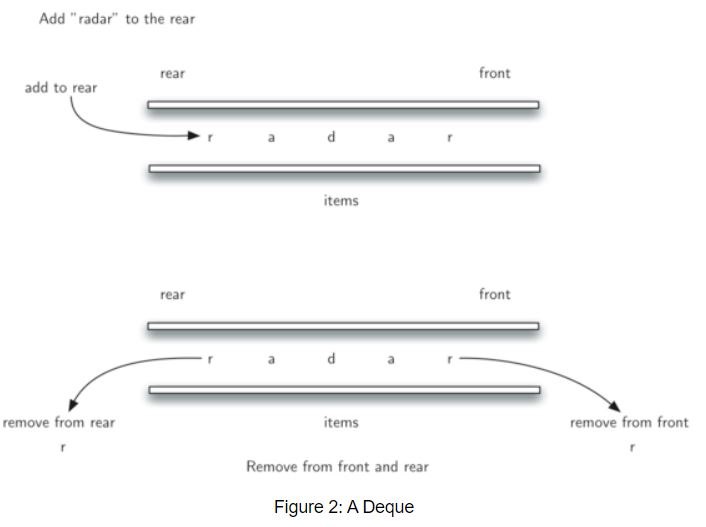

The solution to this problem will use a deque to store the characters of the string. We will process the string from left to right and add each character to the rear of the deque. At this point, the deque will be acting very much like an ordinary queue. However, we can now make use of the dual functionality of the deque. The front of the deque will hold the first character of the string and the rear of the deque will hold the last character. 

In [8]:
from pythonds3.basic import Deque 

def pal_checker(a_string):
    # Initialize deque
    char_deque = Deque()
    
    # Loop through each character and add to the rear
    for ch in a_string: 
        char_deque.add_rear(ch)
    
    # While deque is bigger than 1 character store first & last characters
    while char_deque.size() > 1:
        first = char_deque.remove_front()
        last = char_deque.remove_rear()
        # Checks if palindrome - if first not equal to last, return false
        if first != last:
            return False 
        else:
            return True

In [9]:
# Evaluate function with some cases 

a = 'lsdkjfskf'
b = 'radar'
c = 'madam'
d = 'lady'

print(pal_checker(a))
print(pal_checker(b))
print(pal_checker(c))
print(pal_checker(d))

False
True
True
False
